##### Business Intelligence - Laboratorio 01 25-03-24  
by M.Sc. Emerson D. Norabuena 
Caso: análisis exploratorio del Crédito Bancario BCP - UNMSM

## Acerca del conjunto de datos

Contexto

Este es el conjunto de datos utilizado en la sección "ANN (Artificial Neural Networks)" del curso de Udemy de Kirill Eremenko (Científico de datos y experto en sistemas Forex) y Hadelin de Ponteves (Científico de datos), llamado Deep Learning AZ™: Hands-On Artificial Redes neuronales . El conjunto de datos es muy útil para los principiantes en el aprendizaje automático y es un campo de juego sencillo donde comparar varias técnicas/habilidades.

Se puede descargar gratuitamente aquí: https://www.superdatascience.com/deep-learning/

Objetivo de estudio:
Un banco está investigando una tasa muy alta de clientes que abandonan el banco. Aquí hay un conjunto de datos de 10.000 registros para investigar y predecir cuáles de los clientes tienen más probabilidades de abandonar el banco pronto.

Los atributos de esta dataset es:

1. RowNumber
1. CustomerId
1. Surname
1. CreditScore
1. Geography
1. Gender
1. Age
1. Tenure
1. Balance
1. NumOfProducts
1. HasCrCard
1. IsActiveMember
1. EstimatedSalary
1. Exited

Conten:
1. Load and Check Data
1. Data Visualization
1. Feature Engineering
1. Modeling Train - Test Split
1. Standardization

In [ ]:
#!pip install tensorflow

In [ ]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

In [1]:
#Importación de paquetes 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler

#from keras.utils import to_categorical
#import tensorflow as tf
#from tensorflow import keras


1. Load and Check Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Emerson2021/BI/main/Churn_Modelling.csv', sep=';', encoding='unicode_escape').astype(str)
#data=pd.read_csv("C:/Users/Nor4buena/Documents/Notebooks/Churn_Modelling.csv")

In [3]:
data.head()

RowNumber CustomerId   Surname CreditScore Geography  Gender Age Tenure  \
0         1   15634602  Hargrave         619    France  Female  42      2   
1         2   15647311      Hill         608     Spain  Female  41      1   
2         3   15619304      Onio         502    France  Female  42      8   
3         4   15701354      Boni         699    France  Female  39      1   
4         5   15737888  Mitchell         850     Spain  Female  43      2   

     Balance NumOfProducts HasCrCard IsActiveMember EstimatedSalary Exited  
0        0.0             1         1              1       101348.88      1  
1   83807.86             1         0              1       112542.58      0  
2   159660.8             3         1              0       113931.57      1  
3        0.0             2         0              0        93826.63      0  
4  125510.82             1         1              1         79084.1      0

In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10000 non-null  object
 1   CustomerId       10000 non-null  object
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  object
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  object
 7   Tenure           10000 non-null  object
 8   Balance          10000 non-null  object
 9   NumOfProducts    10000 non-null  object
 10  HasCrCard        10000 non-null  object
 11  IsActiveMember   10000 non-null  object
 12  EstimatedSalary  10000 non-null  object
 13  Exited           10000 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [6]:
data.head().describe().T

count unique        top freq
RowNumber           5      5          1    1
CustomerId          5      5   15634602    1
Surname             5      5   Hargrave    1
CreditScore         5      5        619    1
Geography           5      2     France    3
Gender              5      1     Female    5
Age                 5      4         42    2
Tenure              5      3          2    2
Balance             5      4        0.0    2
NumOfProducts       5      3          1    3
HasCrCard           5      2          1    3
IsActiveMember      5      2          1    3
EstimatedSalary     5      5  101348.88    1
Exited              5      2          0    3

In [7]:
data["CustomerId"].nunique()

10000

In [8]:
data["Surname"].nunique()

2932

In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.head()

RowNumber CustomerId   Surname CreditScore Geography  Gender Age Tenure  \
0         1   15634602  Hargrave         619    France  Female  42      2   
1         2   15647311      Hill         608     Spain  Female  41      1   
2         3   15619304      Onio         502    France  Female  42      8   
3         4   15701354      Boni         699    France  Female  39      1   
4         5   15737888  Mitchell         850     Spain  Female  43      2   

     Balance NumOfProducts HasCrCard IsActiveMember EstimatedSalary Exited  
0        0.0             1         1              1       101348.88      1  
1   83807.86             1         0              1       112542.58      0  
2   159660.8             3         1              0       113931.57      1  
3        0.0             2         0              0        93826.63      0  
4  125510.82             1         1              1         79084.1      0

2. Data Visualization

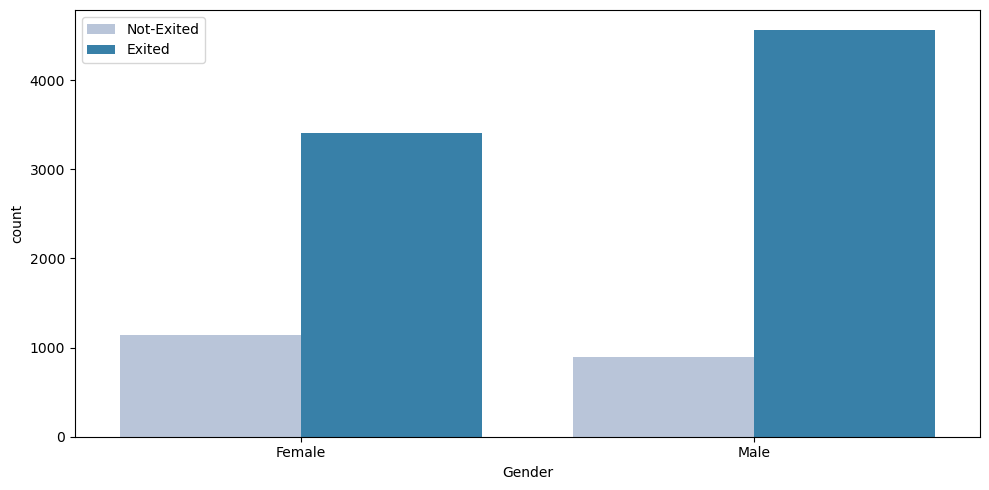

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data,x="Gender",hue="Exited",palette="PuBu")
plt.legend(labels=["Not-Exited","Exited"])
plt.tight_layout()
plt.show()

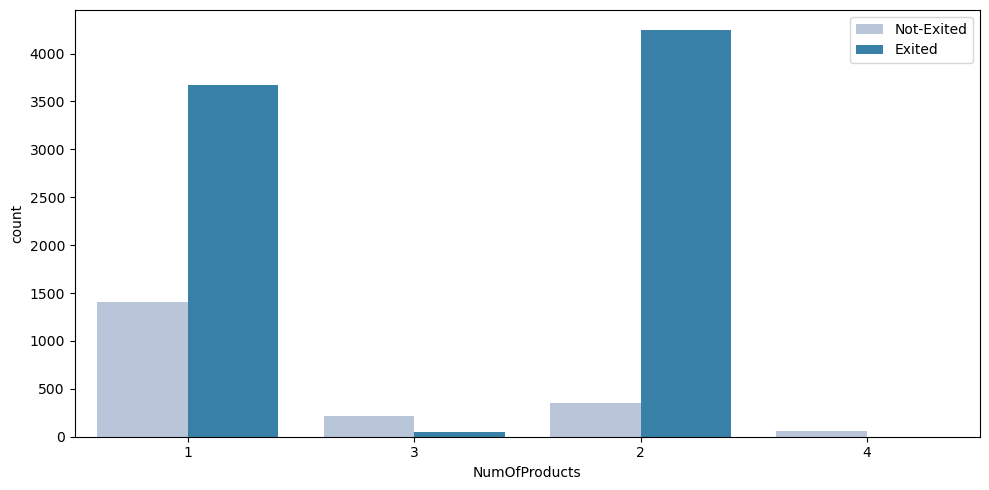

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data,x="NumOfProducts",hue="Exited",palette="PuBu")
plt.legend(labels=["Not-Exited","Exited"])
plt.tight_layout()
plt.show()

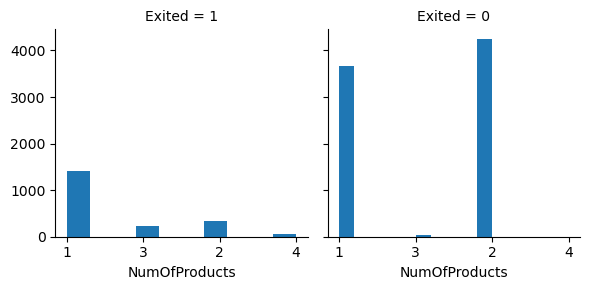

In [13]:
age=sns.FacetGrid(data,col='Exited')
age.map(plt.hist,'NumOfProducts')

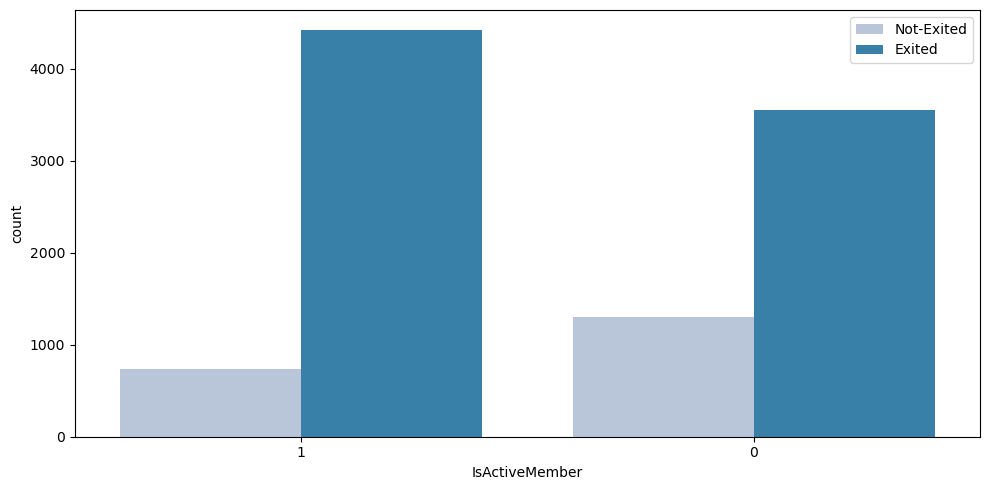

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data,x="IsActiveMember",hue="Exited",palette="PuBu")
plt.legend(labels=["Not-Exited","Exited"])
plt.tight_layout()
plt.show()

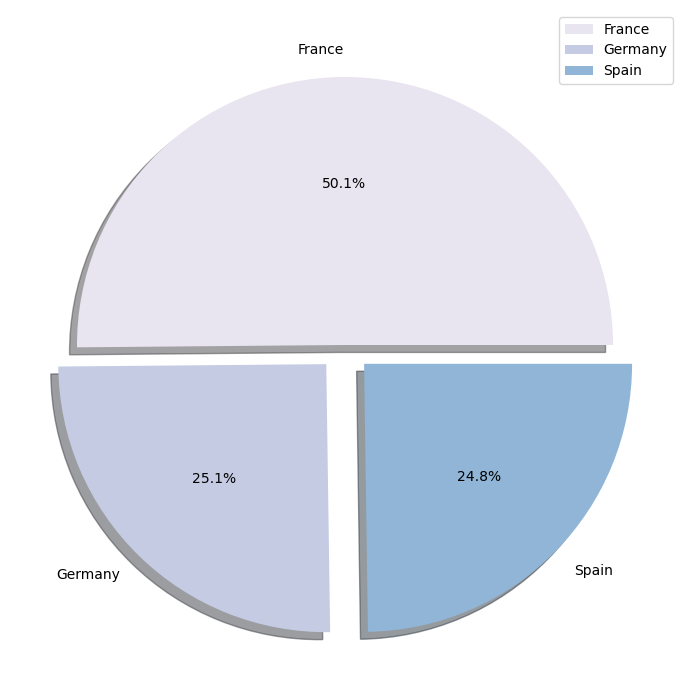

In [15]:
plt.figure(figsize=(10,7))
x_axis=data["Geography"].value_counts()
figlabels=data["Geography"].value_counts().index
plt.pie(x=x_axis,labels=figlabels,autopct="%0.1f%%",explode=[0,0.1,0.1],shadow=True,colors=sns.color_palette("PuBu"))
plt.legend()
plt.tight_layout()
plt.show()

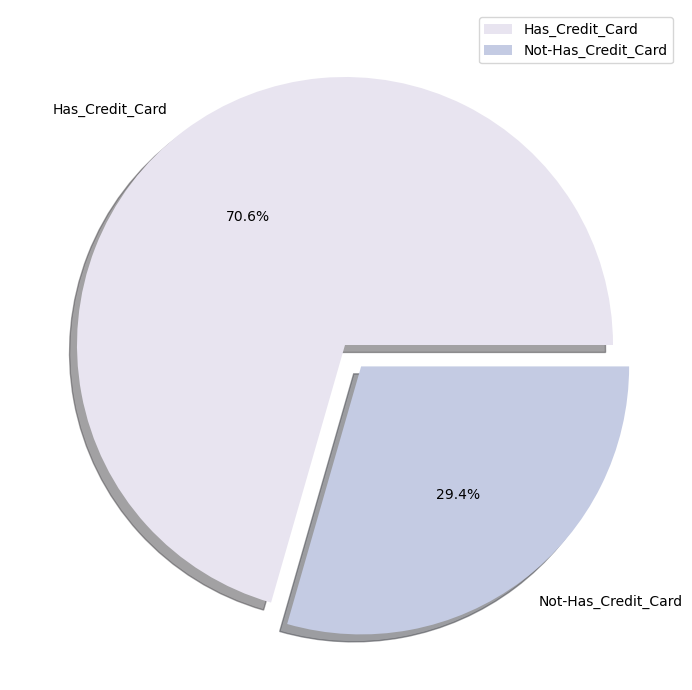

In [16]:
plt.figure(figsize=(10,7))
x_axis=data["HasCrCard"].value_counts()
figlabels=["Has_Credit_Card","Not-Has_Credit_Card"]
plt.pie(x=x_axis,labels=figlabels,autopct="%0.1f%%",explode=[0,0.1],shadow=True,colors=sns.color_palette("PuBu"))
plt.legend()
plt.tight_layout()
plt.show()

Normalización de datos

In [17]:
data["Geography"]=LabelEncoder().fit_transform(data["Geography"])
data["Gender"]=LabelEncoder().fit_transform(data["Gender"])

In [18]:
scaler=MinMaxScaler()

data["CreditScore"]=scaler.fit_transform(data[["CreditScore"]].values)
data["Balance"]=scaler.fit_transform(data[["Balance"]].values)
data["EstimatedSalary"]=scaler.fit_transform(data[["EstimatedSalary"]])

In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/Emerson2021/BI/main/Churn_Modelling.csv', sep=';', encoding='unicode_escape')
#data=pd.read_csv("C:/Users/Nor4buena/Documents/Notebooks/Churn_Modelling.csv")

Codificador de datos

In [20]:
lb=LabelEncoder()
data['Gender']=lb.fit_transform(data['Gender'])

In [21]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France       0   42   
1          2    15647311      Hill          608     Spain       0   41   
2          3    15619304      Onio          502    France       0   42   
3          4    15701354      Boni          699    France       0   39   
4          5    15737888  Mitchell          850     Spain       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
#data = pd.get_dummies(data, columns= ["Geography"])
#data = pd.get_dummies(data, columns= ["Gender"])
#data = pd.get_dummies(data, columns= ["NumOfProducts"])
#data.head()

In [22]:
print("Max age: ", data['Age'].max())
print("Min age: ", data['Age'].min())

Max age:  92
Min age:  18


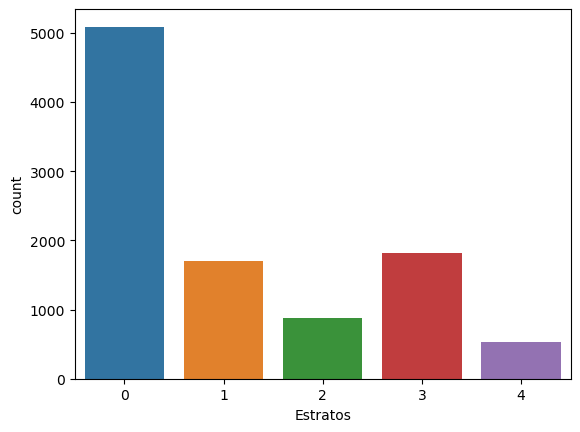

In [23]:
age_cat = [0 if i < 38 else 1 if i <42  else 2 if i < 45 else 3 if i < 60 else 4 for i in data["Age"]]
data["Estratos"] = age_cat

sns.countplot(x = "Estratos", data = data)
plt.show()

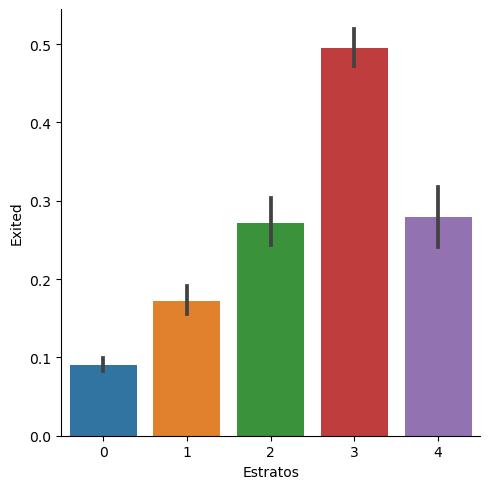

In [24]:
g = sns.catplot(x = "Estratos", y = "Exited", data = data, kind = "bar")
g.set_ylabels("Exited")
plt.show()

C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


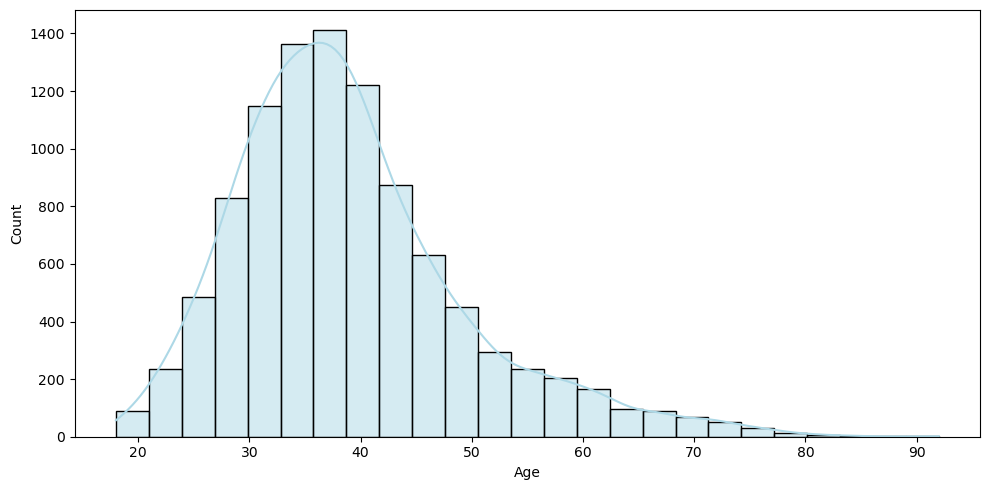

In [25]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(data["Age"],bins=25,kde=True,color="lightblue",ax=ax)
plt.tight_layout()
plt.show()

C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

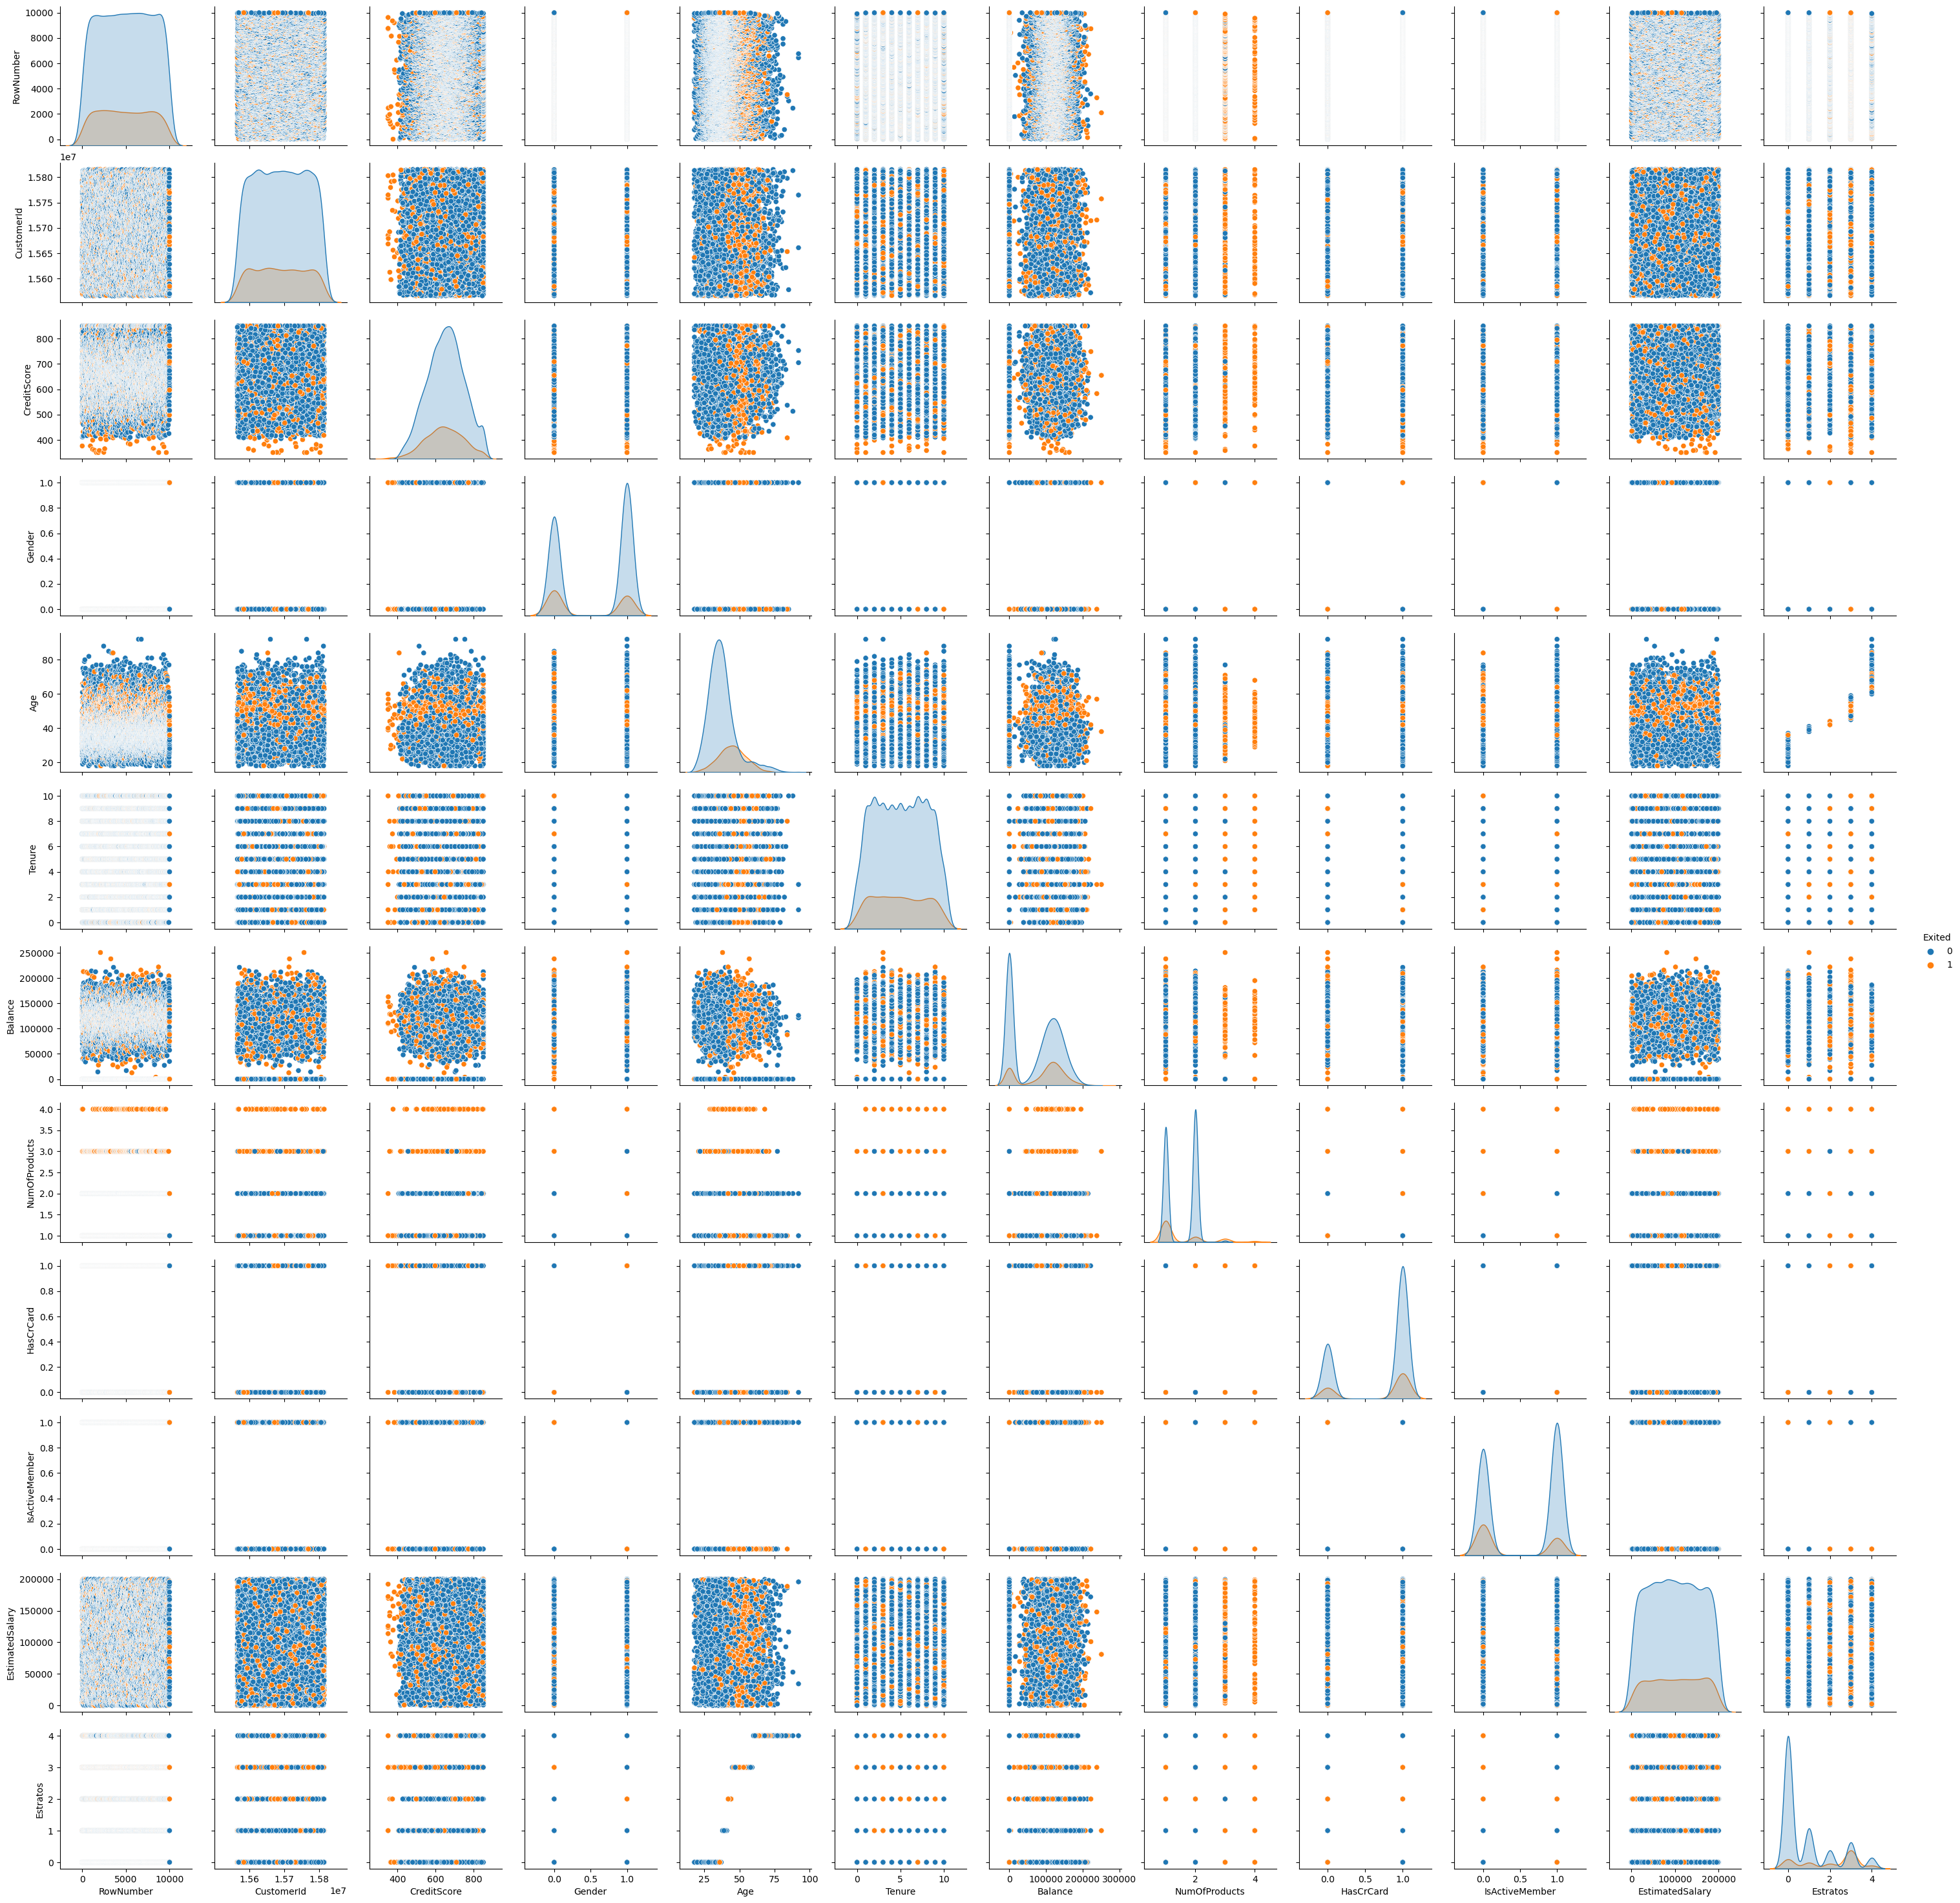

In [26]:
sns.pairplot(data, hue="Exited")
plt.show()

In [27]:
data.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 91.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\U

<Axes: xlabel='IsActiveMember', ylabel='Age'>

C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


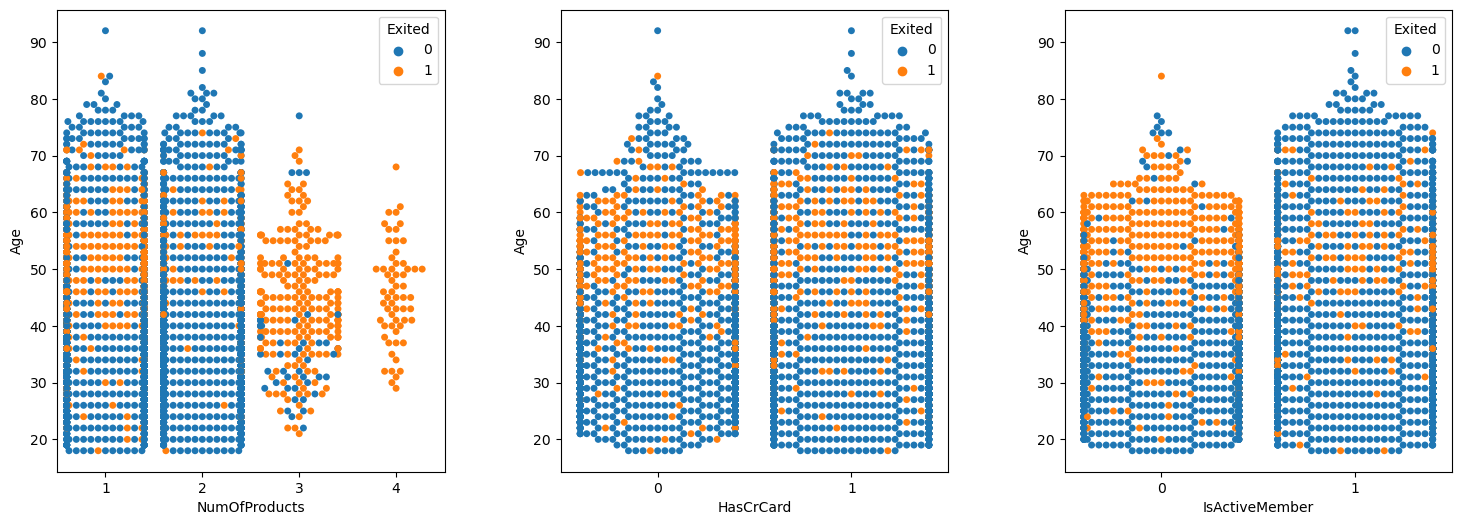

In [28]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = data, ax= ax[0])
sns.swarmplot(x = "HasCrCard", y = "Age", data = data, hue="Exited", ax = ax[1])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = data, ax = ax[2])

In [29]:
encoder = LabelEncoder()
data["Geography"] = encoder.fit_transform(data["Geography"])
data["Gender"] = encoder.fit_transform(data["Gender"])

<Axes: xlabel='Age'>

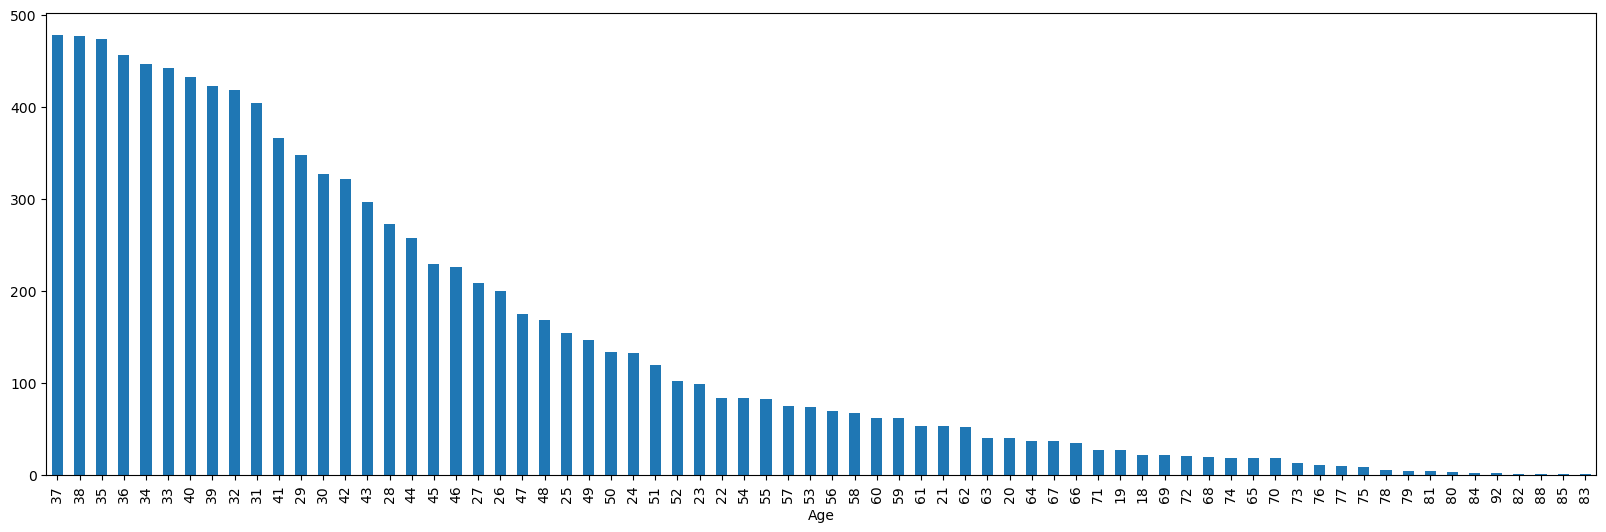

In [30]:
data["Age"].value_counts().plot.bar(figsize=(20,6))

C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

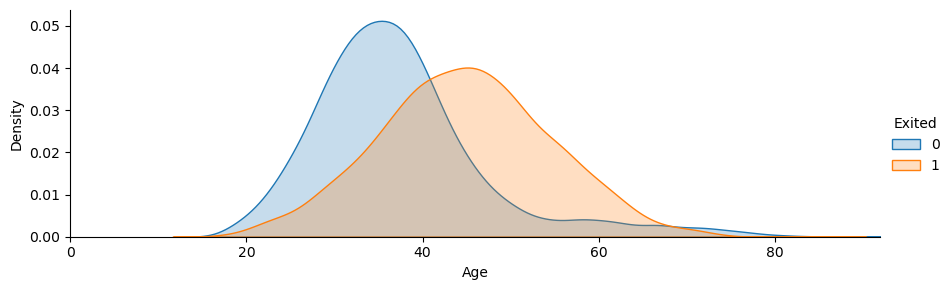

In [31]:
facet = sns.FacetGrid(data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, data["Age"].max()))
facet.add_legend()

plt.show()

C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='HasCrCard', ylabel='Age'>

C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


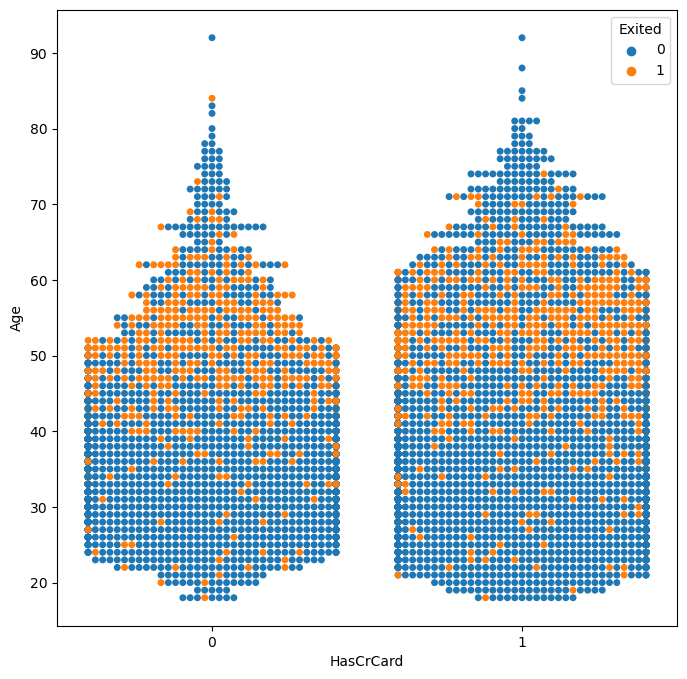

In [36]:
plt.figure(figsize=(8, 8))
sns.swarmplot(x = "HasCrCard", y = "Age", data = data, hue="Exited")

C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

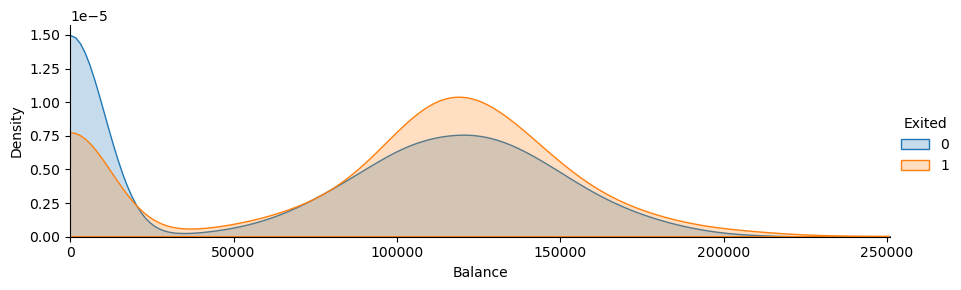

In [37]:
facet = sns.FacetGrid(data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, data["Balance"].max()))
facet.add_legend()

plt.show()

<Axes: xlabel='Balance', ylabel='CreditScore'>

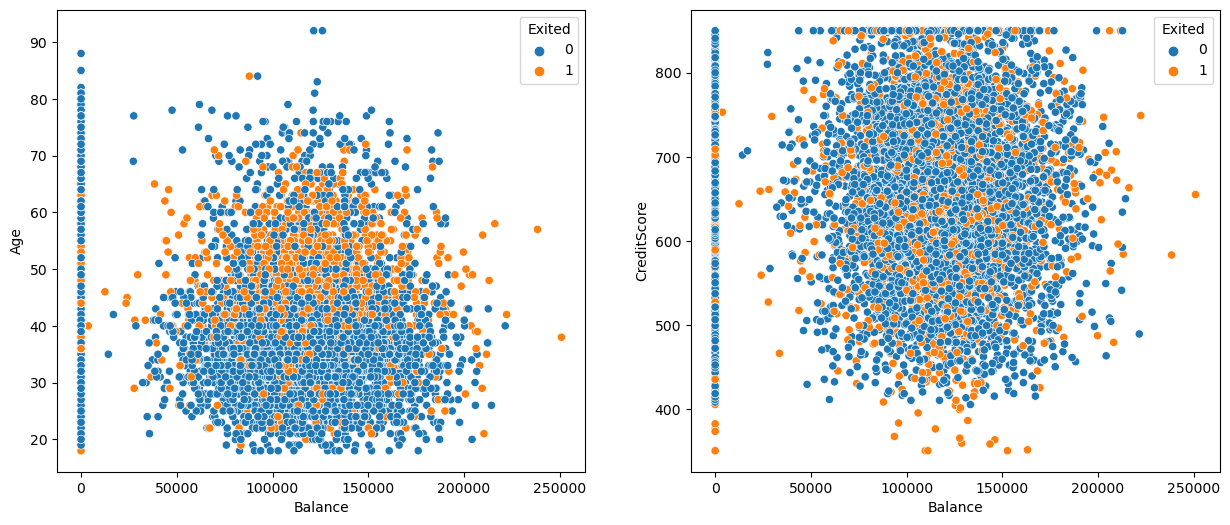

In [38]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = data, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = data, hue="Exited", ax = ax[1])

C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Nor4buena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

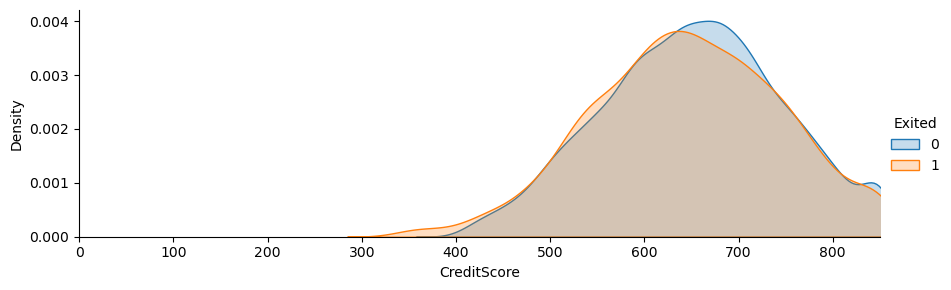

In [39]:
facet = sns.FacetGrid(data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, data["CreditScore"].max()))
facet.add_legend()

plt.show()

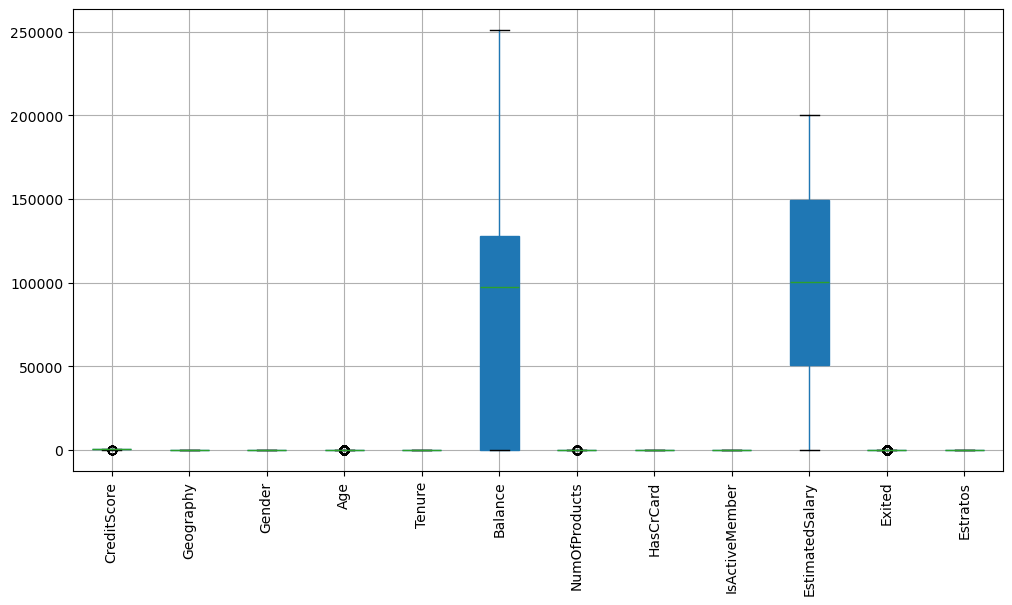

In [40]:
plt.figure(figsize=(12,6))
bplot = data.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

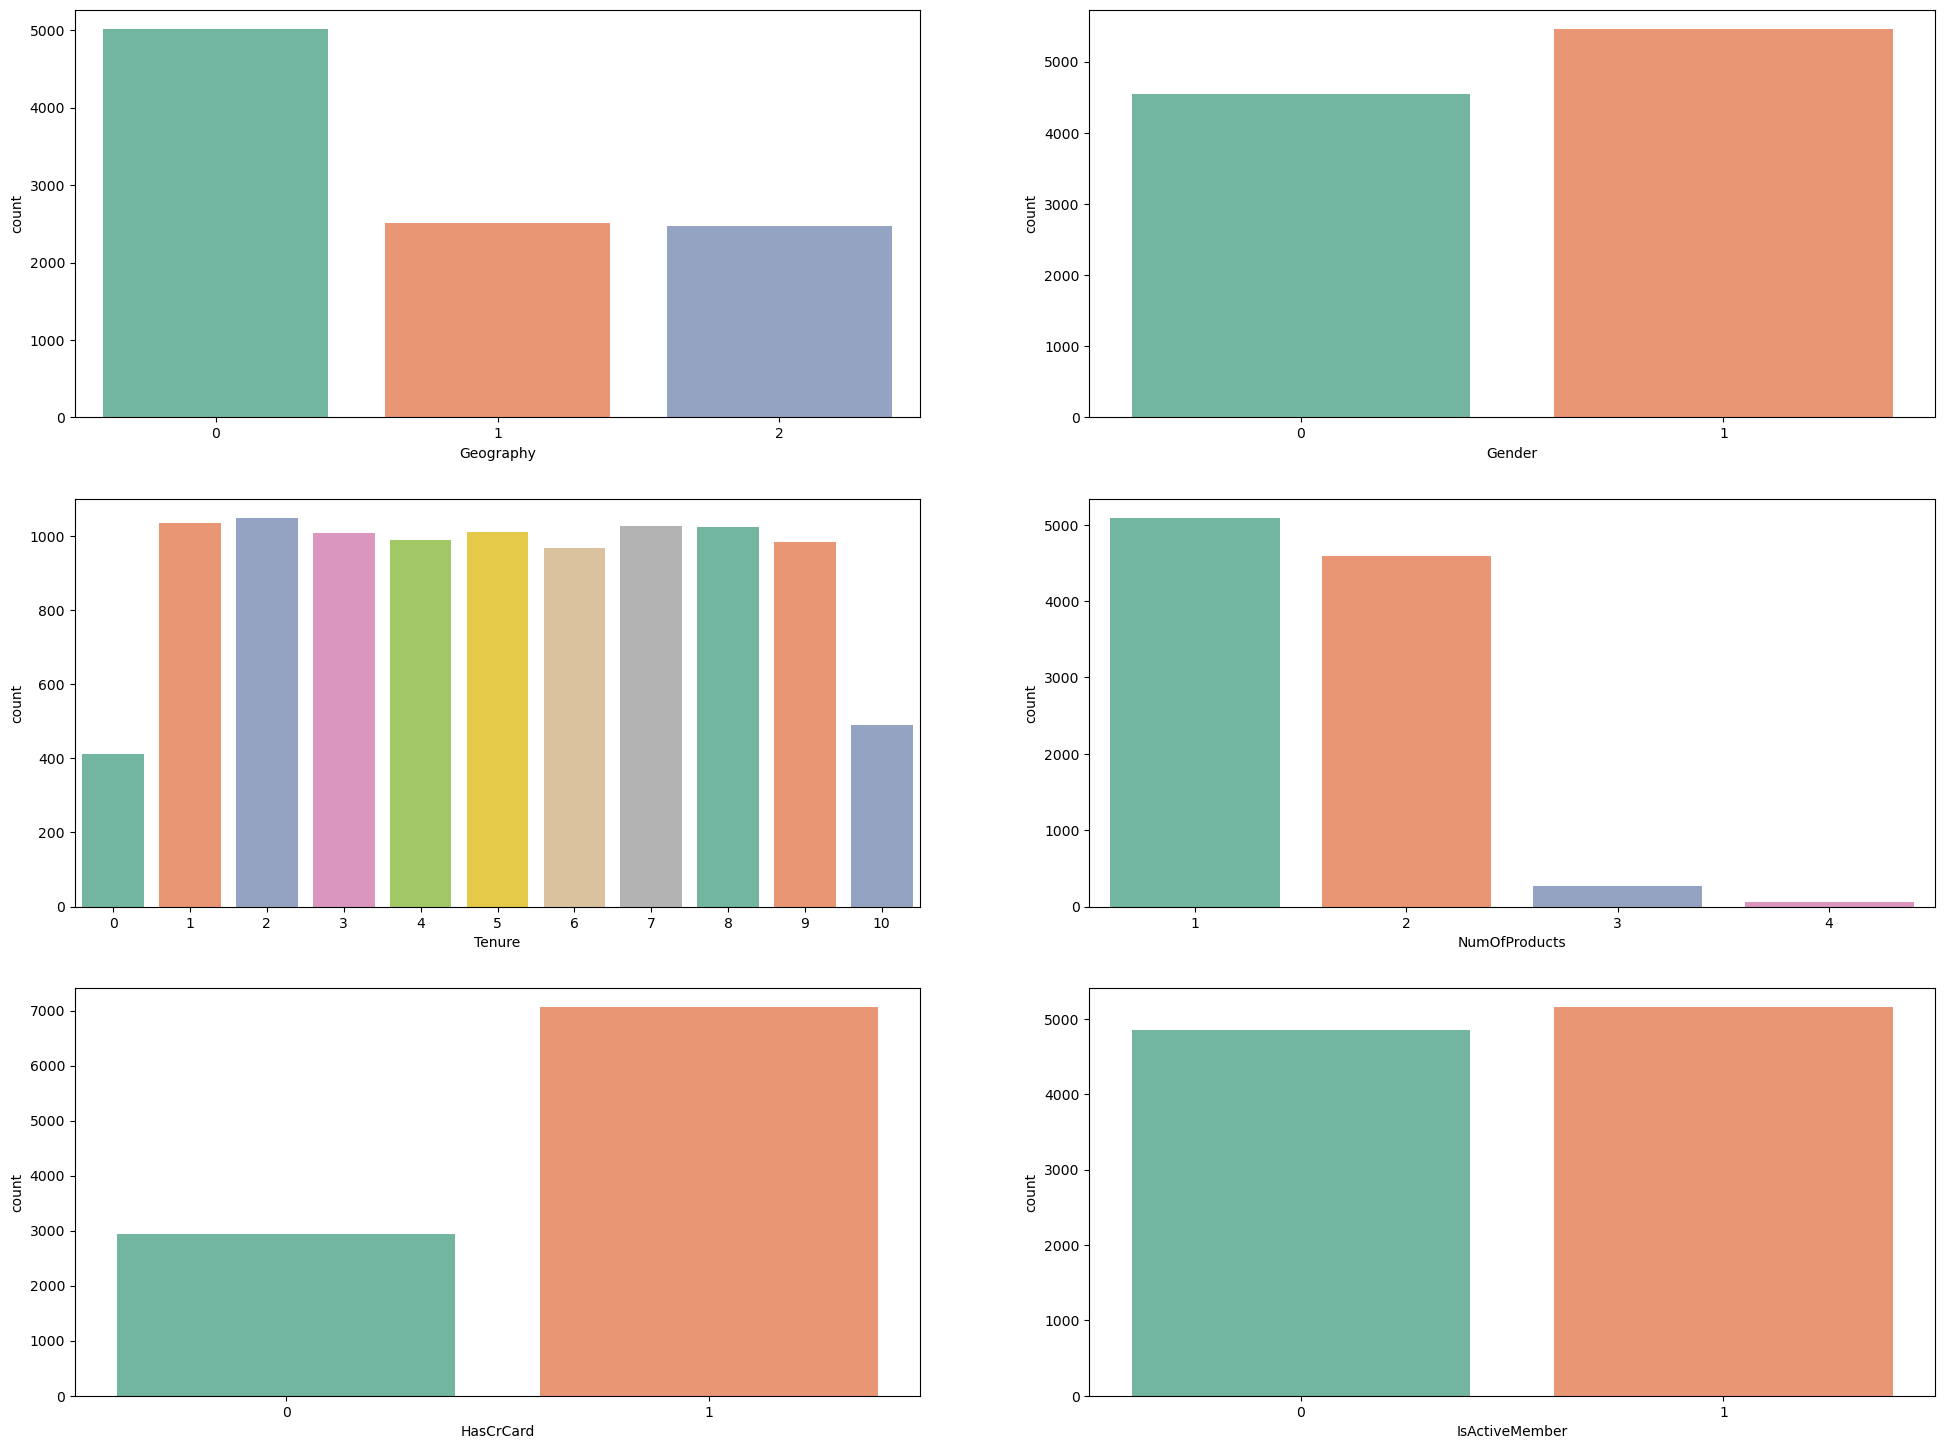

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(24,18))
axes = axes.flatten()
features = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]
for i in range(len(features)):
    sns.countplot(x=features[i],data=data, palette="Set2",ax=axes[i])
    
plt.show()

Está claro que las columnas RowNumber, CustomerId y Surname no tienen ningún poder predictivo, ya que son solo información general sobre un determinado cliente y, para eso, tendría sentido eliminarlas usando el método drop en pandas DataFrames. Observe que vamos a establecer el argumento inplace en True para aplicar las modificaciones a los datos actuales.

In [44]:
map_gen ={"Male":1,"Female":1}
map_geo ={"France":0,"Spain":1,"Germany":2}
data["Gender"]=data["Gender"].map(map_gen)
data["Geography"]=data["Geography"].map(map_geo)
data.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619        NaN     NaN   42       2       0.00              1   
1          608        NaN     NaN   41       1   83807.86              1   
2          502        NaN     NaN   42       8  159660.80              3   
3          699        NaN     NaN   39       1       0.00              2   
4          850        NaN     NaN   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Estratos  
0          1               1        101348.88       1         2  
1          0               1        112542.58       0         1  
2          1               0        113931.57       1         2  
3          0               0         93826.63       0         1  
4          1               1         79084.10       0         2

In [45]:
data.loc[ data['CreditScore'] <= 579, 'CreditScore'] = 0
data.loc[(data['CreditScore'] >= 580) & (data['CreditScore'] <= 669), 'CreditScore'] = 1
data.loc[(data['CreditScore'] >= 670) & (data['CreditScore'] <= 739), 'CreditScore']   = 2
data.loc[(data['CreditScore'] >= 740) & (data['CreditScore'] <= 799), 'CreditScore']   = 3
data.loc[ data['CreditScore'] >= 800, 'CreditScore'] = 4
data["CreditScore"]=data["CreditScore"].astype(int)
data.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0            1        NaN     NaN   42       2       0.00              1   
1            1        NaN     NaN   41       1   83807.86              1   
2            0        NaN     NaN   42       8  159660.80              3   
3            2        NaN     NaN   39       1       0.00              2   
4            4        NaN     NaN   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Estratos  
0          1               1        101348.88       1         2  
1          0               1        112542.58       0         1  
2          1               0        113931.57       1         2  
3          0               0         93826.63       0         1  
4          1               1         79084.10       0         2

In [46]:
data.loc[ data['Age'] <= 32, 'Age'] = 0
data.loc[(data['Age'] > 32) & (data['Age'] <= 37), 'Age'] = 1
data.loc[(data['Age'] > 37) & (data['Age'] <= 44), 'Age']   = 2
data.loc[ data['Age'] > 44, 'Age'] = 3
data["Age"]=data["Age"].astype(int)
data.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0            1        NaN     NaN    2       2       0.00              1   
1            1        NaN     NaN    2       1   83807.86              1   
2            0        NaN     NaN    2       8  159660.80              3   
3            2        NaN     NaN    2       1       0.00              2   
4            4        NaN     NaN    2       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Estratos  
0          1               1        101348.88       1         2  
1          0               1        112542.58       0         1  
2          1               0        113931.57       1         2  
3          0               0         93826.63       0         1  
4          1               1         79084.10       0         2

<Axes: xlabel='Age', ylabel='count'>

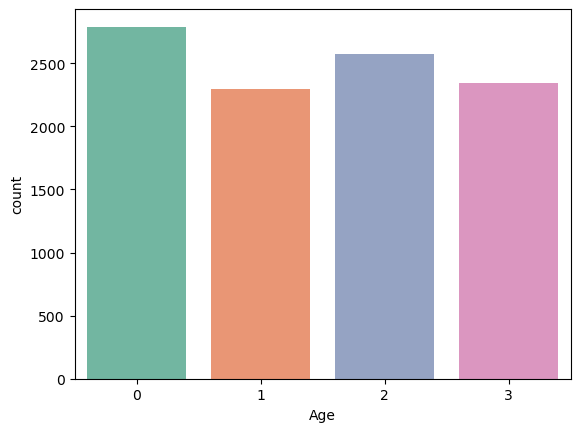

In [47]:
sns.countplot(x="Age",data=data, palette="Set2")

3. Feature Engineering